In [47]:
import pandas as pd
import numpy as np
from collections import Counter
from ast import literal_eval
from matplotlib import pyplot as plt
from scipy.stats import t

In [48]:
def add_address_of_data(given_address): # could be useful for easily allowing others to use this file
    return "".join([given_address, "/testGrouped.csv"])

def add_address_of_reduced_url(given_address): # could be useful for easily allowing others to use this file
    return "".join([given_address, "/references/url_references_reduced.csv"])

# ------ operations -------
def load_time_spent_to_list(size, url_infos, time_infos):
    temp = [[] * 1 for i in range(size+1)] # 2D list, changeable and allows same values where each index represents the id of the page

    for x in range(len(time_infos)):
        time_info = time_infos[x] # accessing time_spent info of the user
        current_URL_list = url_infos[x] # accessing page ids the user has accessed
        for y in range(len(time_info)):
            temp[current_URL_list[y]].append(time_info[y]) # adding time info to it's corresponding index (page id)

    return temp

def get_average_list(given_lists, lower_bound = 0):
    avg_time_spent_list = [int(sum(given_list) / len(given_list)) if len(given_list) > lower_bound else 0 for given_list in given_lists]
    return avg_time_spent_list

def get_freq_list(given_lists):
    freq_of_time_spent_list = [len(given_list) for given_list in given_lists] # should length of 0 not be added at all?
    return freq_of_time_spent_list

def get_freq_list(given_lists, lower_bound = 0):
    freq_of_time_spent_list = [len(given_list) if len(given_list) > lower_bound else 0 for given_list in given_lists] # should length of 0 not be added at all?
    freq_of_time_spent_list = [i for i in freq_of_time_spent_list if i != 0] # removing 0
    return freq_of_time_spent_list

# this might not be the correct way of calculating confidence intervals, TODO
def get_confidence_interval(given_list): # currently only "frequency list" as an input makes sense to this method
    temp = given_list.copy()
    m = np.mean(temp)
    s = np.std(temp)
    dof = len(temp)-1
    confidence = 0.95

    t_crit = np.abs(t.ppf((1-confidence)/2,dof))

    return [m-s*t_crit/np.sqrt(len(temp)), m+s*t_crit/np.sqrt(len(temp))] # returns lower-bound and upper-bound

def get_var_list(given_lists, lower_bound = 0):
    var_time_spent_list = [np.var(given_list) if len(given_list) > lower_bound else 0 for given_list in given_lists] # is this right?
    return var_time_spent_list

# this will allow us to get top N of any list with it's urls too (assuming index represents the id of page)
def get_top_N(elements, size):
    temp = elements.copy() # to disallow changes of temp to affect the original one
    temp = [int(x) for x in temp] # converting to int to make it easier to represent in visualization
    highest_values = []
    saved_indexes = []
    saved_urls = []

    for k in range(size): # getting top N (size) values
        biggest_val = 0
        for l in range(len(temp)): # find current biggest value
            if temp[l] > biggest_val:
                biggest_val = temp[l]

        highest_values.append(biggest_val)
        current_index = temp.index(biggest_val) # getting index of the first occurrence, this loop will continue until we have no such occurrence; then it will go onto the next value

        saved_indexes.append(current_index)
        saved_urls.append(url_references.urls[current_index]) # url_references.urls[id_of_min]
        temp.remove(biggest_val)

    return highest_values, saved_urls, saved_indexes # additionally returning the urls too for extra information

# this will allow us to get least N of any list with it's urls too (assuming index represents the id of page)
def get_least_N(elements, size):
    temp = elements.copy() # to disallow changes of temp to affect the original one
    temp = [int(x) for x in temp]
    lowest_values = []
    saved_indexes = []
    saved_urls = []

    for k in range(size): # getting top N (size) values
        lowest_val = float("inf")
        for l in range(len(temp)): # find current biggest value
            if temp[l] < lowest_val and temp[l] != 0: # since we set values out of bounds to 0 we need to disregard this
                lowest_val = temp[l]

        lowest_values.append(lowest_val)
        current_index = temp.index(lowest_val) # returns the first occurrence, so no problem

        saved_indexes.append(current_index)
        saved_urls.append(url_references.urls[current_index]) # url_references.urls[id_of_min]
        temp.remove(lowest_val)

    return lowest_values, saved_urls, saved_indexes

def get_url(id):
    return url_references.loc[url_references['id'] == id]['urls'].tolist()

In [49]:
my_address = "C:/Users/dnaen/APG_data" # only this has to be modified
conv = {"url_id_path": literal_eval, "seconds_spent_path": literal_eval}
df = pd.read_csv(add_address_of_data(my_address), converters = conv)
url_references = pd.read_csv(add_address_of_reduced_url(my_address))

In [50]:
# keep this cell separate because it takes time
info_list = load_time_spent_to_list(len(url_references['id']), df["url_id_path"], df["seconds_spent_path"])

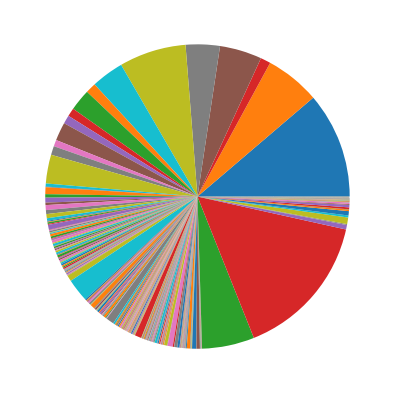

In [51]:
freq_list = get_freq_list(info_list)

fig = plt.subplots(figsize = (15,7))

plt.pie(freq_list)
plt.show('pie_chart_for_freq_of_sites.pdf')

In [52]:
before_freq_list = get_freq_list(info_list)

lower, upper = get_confidence_interval(before_freq_list)
print(lower)
print(upper)

3679.4230246352927
10068.24067718597


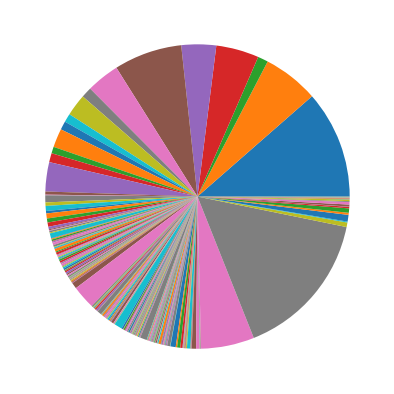

In [53]:
after_freq_list = get_freq_list(info_list, lower)

fig = plt.subplots(figsize = (15,7))

plt.pie(after_freq_list)
plt.show('pie_chart_for_freq_of_sites.pdf')

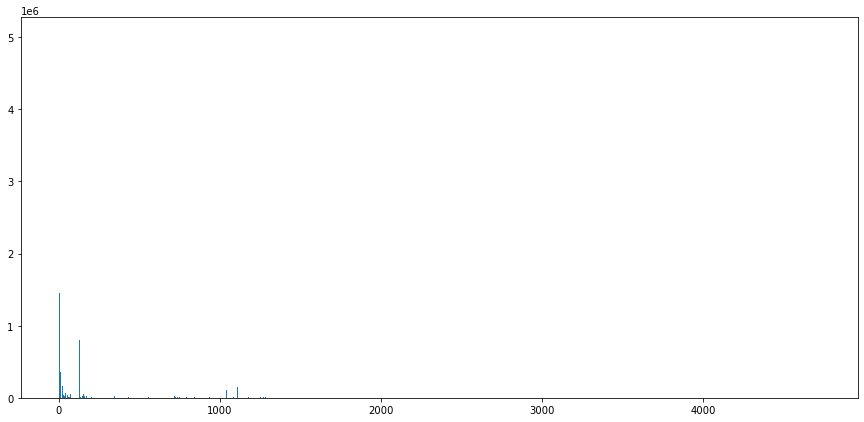

In [54]:
# before pruning frequency list
fig = plt.subplots(figsize = (15,7))
plt.bar(range(len(before_freq_list)), before_freq_list)

# show plot
plt.show()

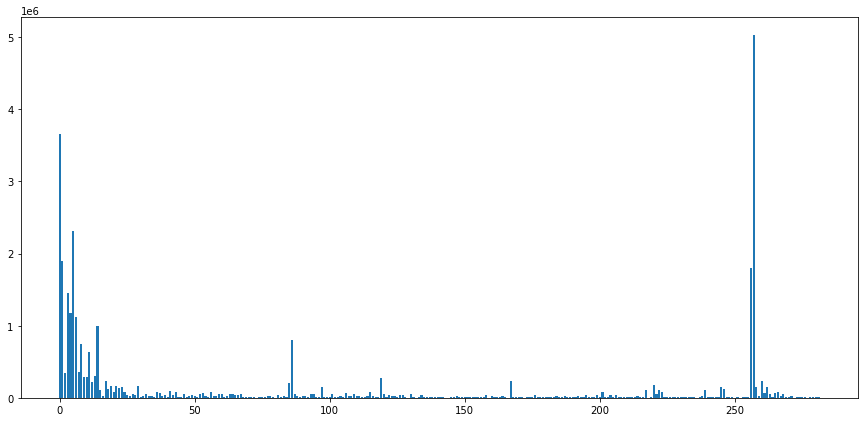

In [55]:
# after pruning frequency list
after_freq_list = get_freq_list(info_list, lower)

fig = plt.subplots(figsize = (15,7))
plt.bar(range(len(after_freq_list)), after_freq_list)

# show plot
plt.show()

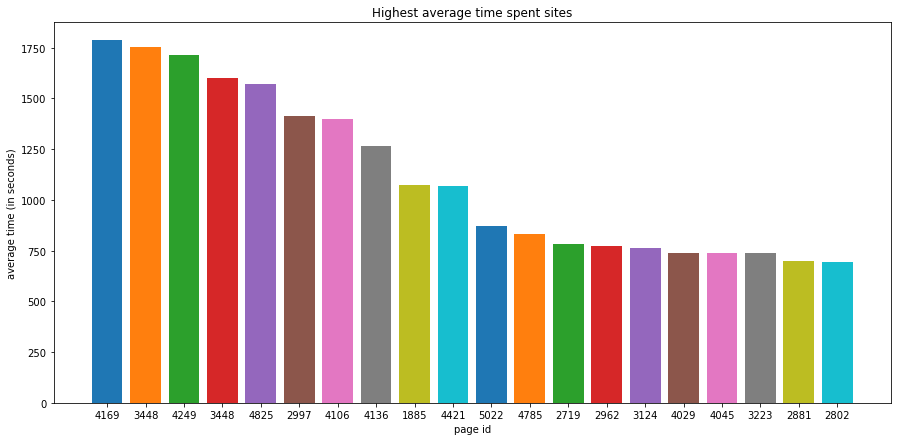

In [64]:
# this part is for finding out the top N the highest averages before pruning

# deciding N
size = 20

avg_list = get_average_list(info_list)
[sorted_avg_list, urls_of_sorted_avg, indexes_of_sorted_avg] = get_top_N(avg_list, size)

fig = plt.subplots(figsize = (15,7))

 # plt.bar(indexes_of_sorted_avg[-size:], sorted_avg_list[-size:])

xs = np.arange(len(indexes_of_sorted_avg))
plt.xticks(xs, indexes_of_sorted_avg)

for i, x in enumerate(xs):
    plt.bar(i, sorted_avg_list[x])

labels = urls_of_sorted_avg
plt.title('Highest average time spent sites')
plt.xlabel('page id')
plt.ylabel('average time (in seconds)')
plt.legend(labels)

plt.show('top_20_avg_time_spent_sites_before_prune.pdf')

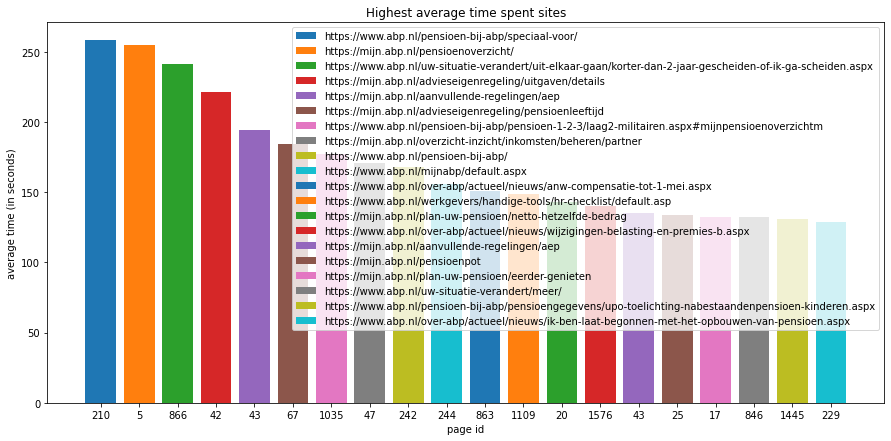

In [72]:
# this part is for finding out the top N the highest averages after the pruning

# deciding N
size = 20

avg_list = get_average_list(info_list, lower)
[sorted_avg_list, urls_of_sorted_avg, indexes_of_sorted_avg] = get_top_N(avg_list, size)

fig = plt.subplots(figsize = (15,7))

 # plt.bar(indexes_of_sorted_avg[-size:], sorted_avg_list[-size:])

xs = np.arange(len(indexes_of_sorted_avg))
plt.xticks(xs, indexes_of_sorted_avg)

for i, x in enumerate(xs):
    plt.bar(i, sorted_avg_list[x])

labels = urls_of_sorted_avg
plt.title('Highest average time spent sites')
plt.xlabel('page id')
plt.ylabel('average time (in seconds)')
plt.legend(labels)

plt.show('top_20_avg_time_spent_sites_after_prune.pdf')

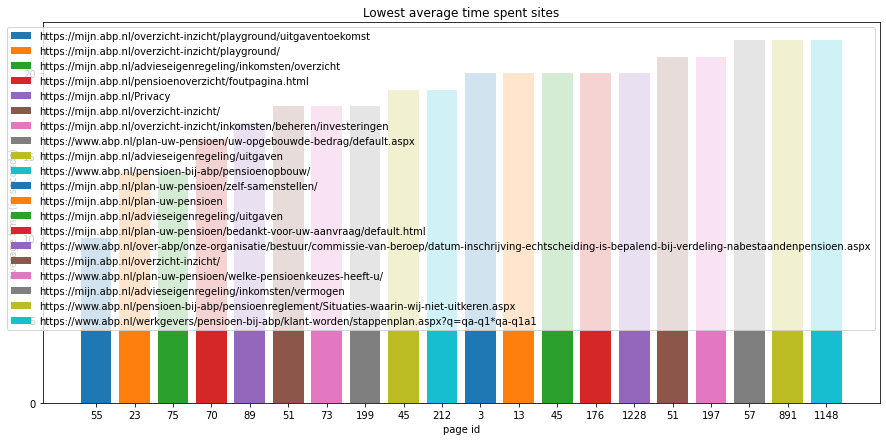

In [66]:
# this part is for finding out the least N of the averages after the pruning

# deciding N
size = 20

avg_list = get_average_list(info_list, lower)
[sorted_avg_list, urls_of_sorted_avg, indexes_of_sorted_avg] = get_least_N(avg_list, size)

fig = plt.subplots(figsize = (15,7))

 # plt.bar(indexes_of_sorted_avg[-size:], sorted_avg_list[-size:])

xs = np.arange(len(indexes_of_sorted_avg))
plt.xticks(xs, indexes_of_sorted_avg)

for i, x in enumerate(xs):
    plt.bar(i, sorted_avg_list[x])

labels = urls_of_sorted_avg
plt.title('Lowest average time spent sites')
plt.xlabel('page id')
plt.ylabel('average time (in seconds)')
plt.legend(labels)

plt.show('least_20_avg_time_spent_sites_after_prune.pdf')

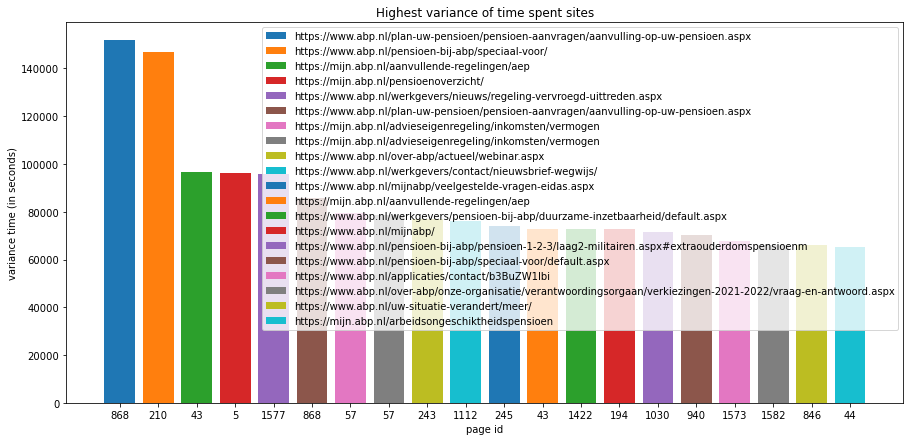

['https://www.abp.nl/plan-uw-pensioen/pensioen-aanvragen/aanvulling-op-uw-pensioen.aspx', 'https://www.abp.nl/pensioen-bij-abp/speciaal-voor/', 'https://mijn.abp.nl/aanvullende-regelingen/aep', 'https://mijn.abp.nl/pensioenoverzicht/', 'https://www.abp.nl/werkgevers/nieuws/regeling-vervroegd-uittreden.aspx', 'https://www.abp.nl/plan-uw-pensioen/pensioen-aanvragen/aanvulling-op-uw-pensioen.aspx', 'https://mijn.abp.nl/advieseigenregeling/inkomsten/vermogen', 'https://mijn.abp.nl/advieseigenregeling/inkomsten/vermogen', 'https://www.abp.nl/over-abp/actueel/webinar.aspx', 'https://www.abp.nl/werkgevers/contact/nieuwsbrief-wegwijs/', 'https://www.abp.nl/mijnabp/veelgestelde-vragen-eidas.aspx', 'https://mijn.abp.nl/aanvullende-regelingen/aep', 'https://www.abp.nl/werkgevers/pensioen-bij-abp/duurzame-inzetbaarheid/default.aspx', 'https://www.abp.nl/mijnabp/', 'https://www.abp.nl/pensioen-bij-abp/pensioen-1-2-3/laag2-militairen.aspx#extraouderdomspensioenm', 'https://www.abp.nl/pensioen-bij-ab

In [73]:
# this part is for finding out the top N the highest variances

# deciding how much far we want to go
size = 20

var_list = get_var_list(info_list, lower)
[sorted_var_list, urls_of_sorted_var, indexes_of_sorted_var] = get_top_N(var_list, size)

fig = plt.subplots(figsize = (15,7))

 # plt.bar(indexes_of_sorted_avg[-size:], sorted_avg_list[-size:])

xs = np.arange(len(indexes_of_sorted_var))
plt.xticks(xs, indexes_of_sorted_var)

for i, x in enumerate(xs):
    plt.bar(i, sorted_var_list[x])

labels = urls_of_sorted_var
plt.title('Highest variance of time spent sites')
plt.xlabel('page id')
plt.ylabel('variance time (in seconds)')
plt.legend(labels)

plt.show('top_20_variance_time_spent_sites_after_prune.pdf')

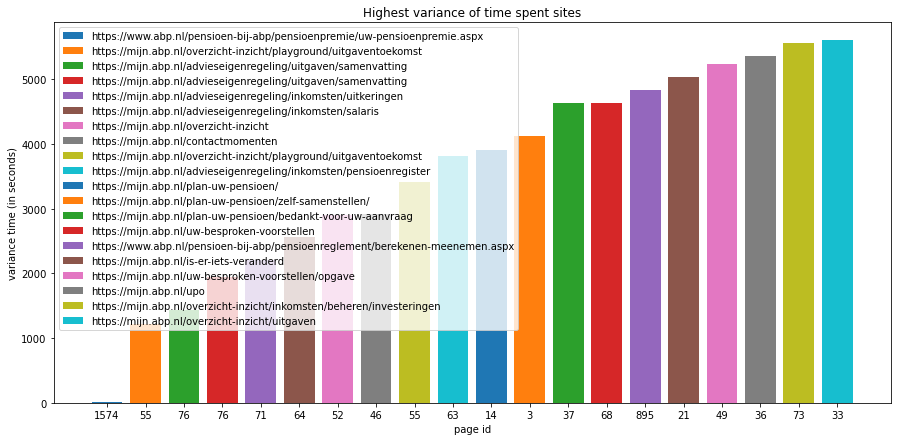

In [70]:
# this part is for finding out the least N of variances

# deciding how much far we want to go
size = 20

var_list = get_var_list(info_list, lower)
[sorted_var_list, urls_of_sorted_var, indexes_of_sorted_var] = get_least_N(var_list, size)

fig = plt.subplots(figsize = (15,7))

 # plt.bar(indexes_of_sorted_avg[-size:], sorted_avg_list[-size:])

xs = np.arange(len(indexes_of_sorted_var))
plt.xticks(xs, indexes_of_sorted_var)

for i, x in enumerate(xs):
    plt.bar(i, sorted_var_list[x])

labels = urls_of_sorted_var
plt.title('Highest variance of time spent sites')
plt.xlabel('page id')
plt.ylabel('variance time (in seconds)')
plt.legend(labels)

plt.show('least_20_variance_time_spent_sites_after_prune.pdf')